<center>
<font size="4">
    <b>
    
Assessing the Safety for Human Repopulation of Fukushima Using Wild Boar as a Mammalian Proxy:<br>
Dose estimates and telomere length, dicentrics, and cortisol
    </b>
</font>
</center>

# Background
---

In March 2011, the Fukushima Daiichi nuclear disaster occurred in the Fukushima prefecture of Japan, after the Tohoku earthquake and tsunami, where three nuckear meltdowns and three hydrogen explosions released radiation into the surrounding environment. This nuclear event was the most serious since the Chernobyl accident of 1986. Today, it remains unknown whether wildlife in areas contaminated by the Fukushima Daiichi Nuclear Disaster are negatively impacted by the chronic, low-dose exposure to ionizing radiation from the accident. 

To assess the impacts of this exposure on wildlife's health, we've trapped a number of wild boar from contaminated regions and examined dose responses for telomere length, dicentric chromosomes, and cortisol levels. For the boar, telomere length was measured in T-cells by telomere Fluorescence in Situ Hybridization (FISH), as were dicentrics, and in PBMCs by qPCR. Cortisol was measured using hair samples. We also captured a number of snakes and examined their telomere lengths and dose exposures.

Biomarkers we'll evaluate for the boar:

+ Telomere Length of T-cells & blood (measured by FISH & qPCR) &nbsp;   
+ Cortisol levels &nbsp;   
+ Dicentric chromosomes &nbsp; 

vs. Total dose / dose rate at capture

In snake, telomere length (qPCR) was evaluated vs. dose rate. Our collected data exists in a wide variety of locations and data formats. Our first tasks are to access, clean, and merge these data into managable dataframe objects.

# Cleaning the Data

Notebook:
[Extracting, Cleaning and Merging the Boar Data](01_Fukushima_Project_Data_Extraction_and_Cleaning.ipynb), in this notebook the following types of data are extracted, cleaned, merged (various combinations) and properly formatted into pandas dataframes for analyses:

+ boar cortisol measurements
+ boar w/ ~5000 individual telomere length measurements (teloFISH)
+ boar w/ qPCR telomere length measurements
+ boar dicentric frequencies (~100 cells per boar)
+ 4 types of new radiation dose estimates for boar
+ some telomere length, dose, age & sex data on snakes

# Exploratory Data Analysis (EDA)

Notebook:
[Exploratory data analysis](02_Fukushima_Project_Visualization_and_Statistics.ipynb), contains extensive EDA.
  
  In this notebook we'll explore the major findings in our data.

# Results 
--- 

In [1]:
# common data handling modules
import numpy as np
import pandas as pd

# statistics
from sklearn.linear_model import LinearRegression
from pygam import LinearGAM, s, l

# custom module for handling telomere length data
import fukushima_telomere_methods as f_tm

# common plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# setting all graphs to have a darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
%matplotlib inline

We will visualize the relationships for our boar between two measures of dose, 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)' & 'Dose rate (uGy per h)', and three biomarkers, telomere length (by teloFISH & qPCR), dicentrics, and cortisol. 

The solid lines in the graphs represent a simple linear regression (x vs. y) between the variables; the shaded color is the line's confidence interval. 

## Boar: dose/dose rate & age vs telomere length (teloFISH)

Here we relate dose/dose rate while controlling for age to telomere length (teloFISH) in boar using linear regressions (Ordinary Least Squares, OLS). The OLS R2 values will be quantified. Data will then be fit using linear generalized additive models to explore if increasing dose/dose rate differently impacts telomere length, explained using partial dependency plots.  

Visualizations are generated using the Python library seaborn & custom functions. Because age is a covariate for telomere length, the relationship between age vs. telomere length is represented graphically on the right-hand plot and as a size factor for the datapoint markers on the left-hand plot.

### Visualization

In [2]:
# loading telomere FISH & dose data
merge_kelly_teloFISH_dose = pd.read_csv('../excel data/cleaned/merge_kelly_teloFISH_dose.csv')

In [29]:
# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


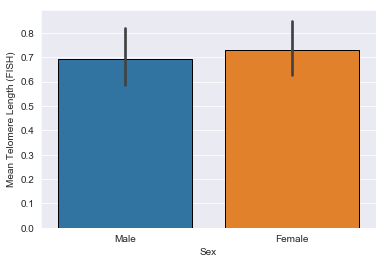

In [31]:
sns.barplot(x='Sex', y='Mean Telomere Length (FISH)', data=merge_kelly_teloFISH_dose)

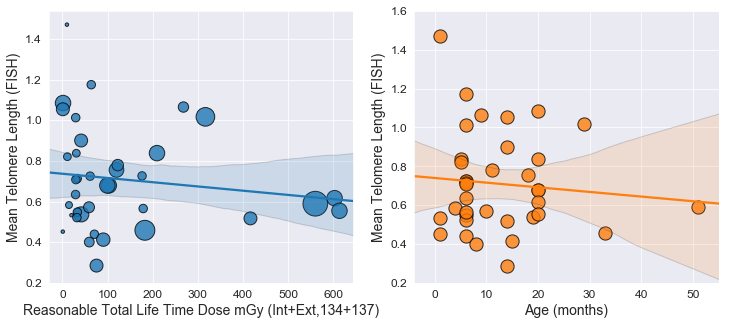

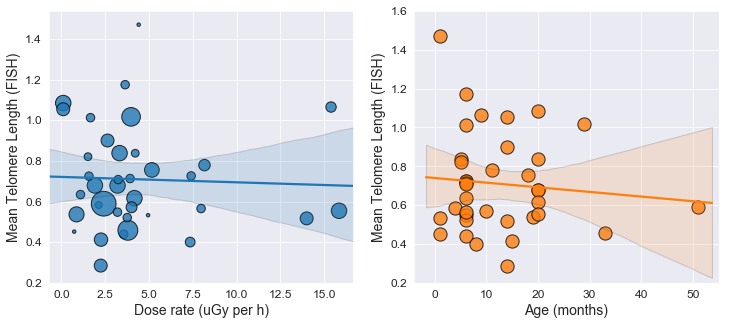

In [30]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
x2 = 'Age (months)'
y = 'Mean Telomere Length (FISH)'

for col in x: 
    f_tm.graph_dose_age_vs_telos(df=merge_kelly_teloFISH_dose, x=col, x2=x2, y=y)

### Statistics 

In [14]:
dose_types = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
y = 'Mean Telomere Length (FISH)'

for dose_type in dose_types:
    x = ['Age (months)']
    x += [dose_type]
    f_tm.score_linear_regressions(x=x, y=y, data=merge_kelly_teloFISH_dose)

Linear regression for ['Age (months)', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Mean Telomere Length (FISH):
Overall R2 is 0.0193

Linear regression for ['Age (months)', 'Dose rate (uGy per h)'] vs. Mean Telomere Length (FISH):
Overall R2 is 0.0110



### Commentary - Linear regressions

We do not see a strong relationship visualized between either type of dose measurement and telomere length as measured by telomere FISH in these boar. While controlling for age in the separate linear regressions, 2% of the variance in mean telomere length was explained by dose (R2 = 0.0193) and 1% in the variance in mean telomere length was explained by dose rate (R2 = 0.011). A very weak or no relationship is observed between these variables.

It's possible that as these variables increase in magnitude, for their observed range, their impact on mean telomere length changes. To explore this possibility, we fit two generalized additive models (GAMs) to the data, dose or dose rate, while controlling for age, and visualized the contributions of each seperate independent variable to mean telomere length over the independent variables' range (dose, dose rate, age). GAMs can model nonlinear relationships and enable clear interpretation of seperate independent variable's impacts on the dependent variable. 

Dose, dose rate, and age were represented using cubic splines as the basis function in the linear GAMs. The plots below are 'partial dependency plots', which quantify the numerical dependency of the target/dependent variable, mean telomere length (FISH), on individual independent variables. 

### Linear GAMS

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 ['Age (months)', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Mean Telomere Length (FISH)


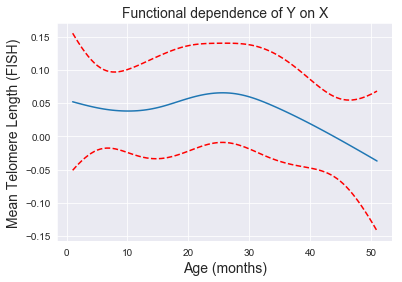

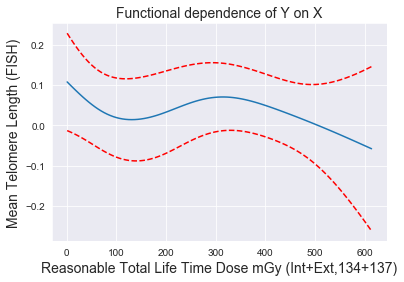

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 ['Age (months)', 'Dose rate (uGy per h)'] vs. Mean Telomere Length (FISH)


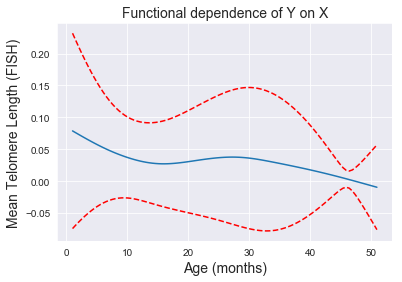

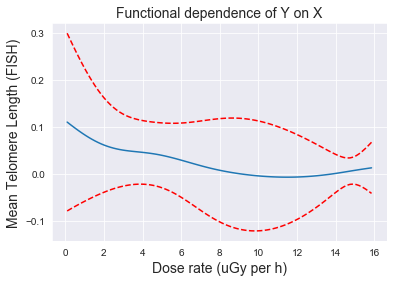

In [19]:
for x in ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']:
    features = ['Age (months)']
    features += [x]
    target = 'Mean Telomere Length (FISH)'
    print(f'PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: \n {features} vs. {target}')
    f_tm.fit_gam_plot_dependencies(df=merge_kelly_teloFISH_dose, features=features, target=target,
                                   basis_1=s, basis_2=s, summary=False)

### Commentary - Linear GAMs

In the partial dependency plots we do not observe clear trends between increasing dose or dose rate on mean telomere length. Age is weakly, negatively associated (~R2 = -.10) with mean telomere length as described in the literature for similar mammals. For the given ranges in these chronic, low-dow exposures, we do not see an appreciable impact of total dose (long-term) or dose rate (short-term) on mean telomere length as measured by teloFISH.

## Boar: dose/dose rate vs. telomere length (qPCR)

Here we will relate dose/dose rate, while controlling for the covariate age, to mean telomere length (qPCR). As was done above, we visualize linear regressions and quantify R2 scores, then fit linear GAMs to the data and visualize partial dependency plots.

### Visualization

In [6]:
# loading telomere (qPCR) & dose data
aryn_qPCR_dose = pd.read_csv('../excel data/cleaned/aryn_boar_qPCR_dose.csv')

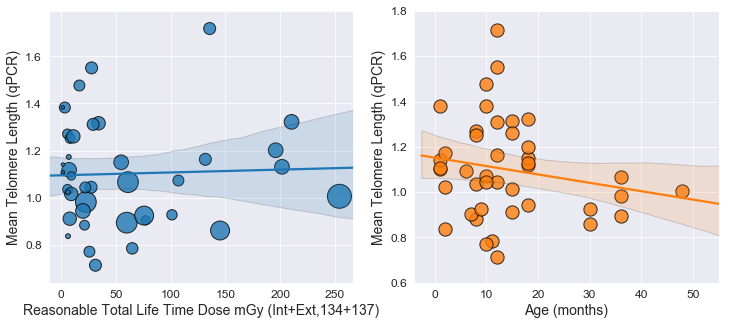

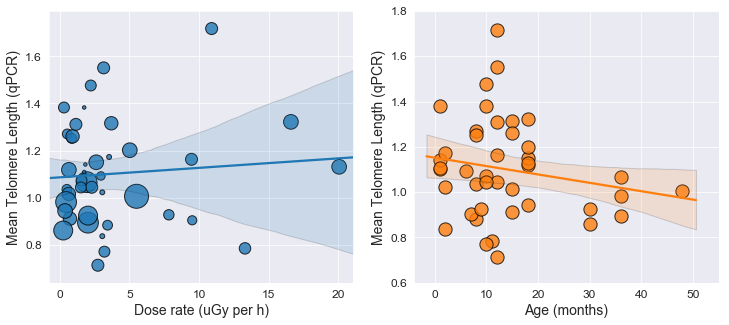

In [7]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
x2 = 'Age (months)'
y = 'Mean Telomere Length (qPCR)'

for col in x: 
    f_tm.graph_dose_age_vs_telos(df=aryn_qPCR_dose, x=col, x2=x2, y=y)

### Statistics 

In [8]:
dose_types = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
y = 'Mean Telomere Length (qPCR)'

for dose_type in dose_types:
    x = ['Age (months)']
    x += [dose_type]
    f_tm.score_linear_regressions(x=x, y=y, data=aryn_qPCR_dose)

Linear regression for ['Age (months)', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Mean Telomere Length (qPCR):
Overall R2 is 0.0579

Linear regression for ['Age (months)', 'Dose rate (uGy per h)'] vs. Mean Telomere Length (qPCR):
Overall R2 is 0.0412



### Commentary - Linear Regressions

We do not see a strong relationship visualized between either type of dose measurement and telomere length (qPCR) in these boar. While controlling for age in the separate linear regressions, 6% of the variance in mean telomere length was explained by dose (R2 = 0.0579) and 4% in the variance in mean telomere length was explained by dose rate (R2 = 0.0412). A very weak or no relationship is observed between these variables. These relationships, or lack of, between dose/dose rate and telomere length measured by qPCR are in strong agreement with those for telomere length by FISH. 

Different boar were measured for telomere length by qPCR and for telomere length by FISH, hence we do not expect these results to be dependent on the specific boar/technique used for measuring telomere length. Rather, we are confident in asserting that  for the given ranges in dose/dose rate measured for these boar, we see very weak or no impacts on telomere length.

Dose, dose rate, and age were represented using cubic splines as the basis function in the linear GAMs. The plots below are 'partial dependency plots', which quantify the numerical dependency of the target/dependent variable, mean telomere length (qPCR), on the individual independent variables.

### Linear GAMs

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 ['Age (months)', 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Mean Telomere Length (qPCR)


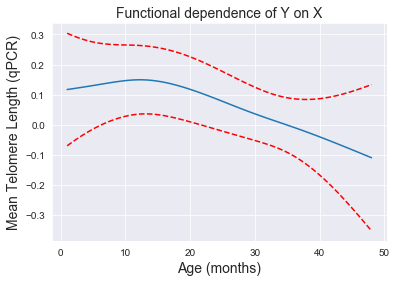

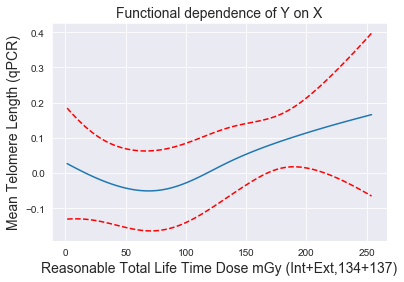

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 ['Age (months)', 'Dose rate (uGy per h)'] vs. Mean Telomere Length (qPCR)


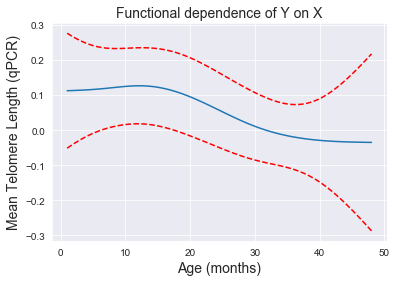

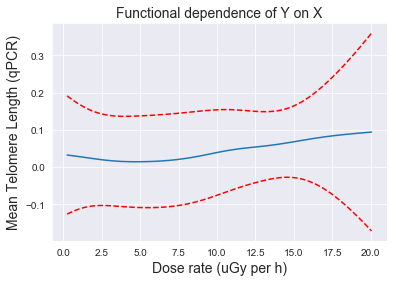

In [9]:
for x in ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']:
    features = ['Age (months)']
    features += [x]
    target = 'Mean Telomere Length (qPCR)'
    print(f'PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: \n {features} vs. {target}')
    f_tm.fit_gam_plot_dependencies(df=aryn_qPCR_dose, features=features, target=target,
                              basis_1=s, basis_2=s, summary=False)

### Commentary - Linear GAMS

In the partial dependency plots we again do not observe clear trends between increasing dose or dose rate on mean telomere length. 

Age is weakly, negatively associated with mean telomere length as described in the literature for similar mammals.

## Boar: dose/dose rate vs. dicentrics 

Thus far we have not seen significant impacts of dose/dose rate on telomere length in the boar, either when measured by qPCR or FISH.

Now, we explore if these boar have serious chromosomal damage, dicentrics, as a function of dose/dose rate. The analysis will follow the same pattern as above.

### Visualization

In [10]:
# loading data dicentrics & dose data
merge_dicentrics_dose = pd.read_csv('../excel data/cleaned/merge_dicentrics_dose.csv')

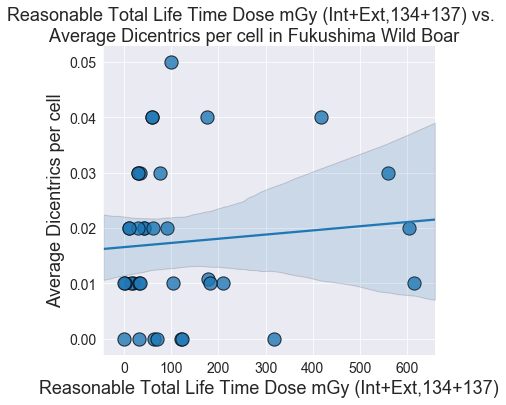

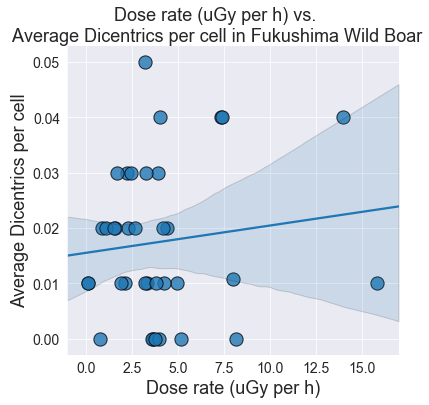

In [11]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
y = 'Average Dicentrics per cell'

for col in x:
    f_tm.linear_regression_graphs_between_variables(x=col, y=y, data=merge_dicentrics_dose)

### Statistics

In [12]:
dose_types = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
y = 'Average Dicentrics per cell'

for dose_type in dose_types:
    f_tm.score_linear_regressions(x=[dose_type], y=y, data=merge_dicentrics_dose)

Linear regression for ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Average Dicentrics per cell:
Overall R2 is 0.0085

Linear regression for ['Dose rate (uGy per h)'] vs. Average Dicentrics per cell:
Overall R2 is 0.0145



### Commentary - Linear Regression

A strong relationship is not observed between dose/dose rate and frequency of dicentrics (~100 cells scored per boar). The dose for the boar in our data set is, relatively speaking, extremely low and importantly, chronic rather than acute. 

### Linear GAMs

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 Reasonable Total Life Time Dose mGy (Int+Ext,134+137) vs. Average Dicentrics per cell


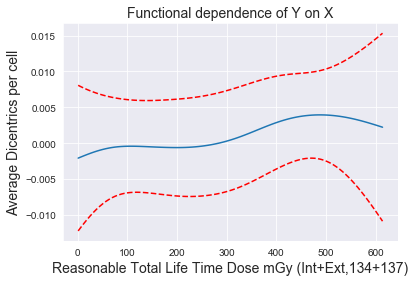

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 Dose rate (uGy per h) vs. Average Dicentrics per cell


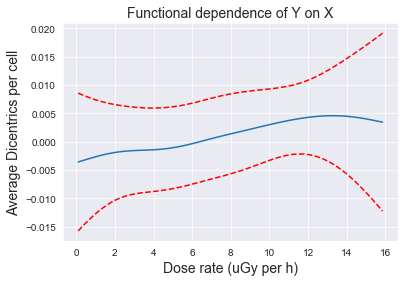

In [14]:
for x in ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']:
    target = 'Average Dicentrics per cell'
    print(f'PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: \n {x} vs. {target}')
    f_tm.fit_gam_plot_dependencies(df=merge_dicentrics_dose, features=[x], target=target,
                              basis_1=s, summary=False)

### Commentary - Linear GAMS

In the partial dependency plots we do not observe clear trends between increasing dose or dose rate on the average number of dicentrics. While we see peaks at 500 mGy and ~13uGy/h, the peaks are driven by 1-2 datapoints rather than an actual trend.

## Boar: dose/dose rate vs. cortisol

It may be that while these low doses of radiation exposure do not markedly affect telomere length or dicentrics, they may still exert a stressor effect on the boar. Let's examine whether that's the case using cortisol, a marker of stress.

### Visualization

In [3]:
# loading data cortisol & dose 
total_dose_cortisol = pd.read_csv('../excel data/cleaned/total_dose_cortisol.csv')

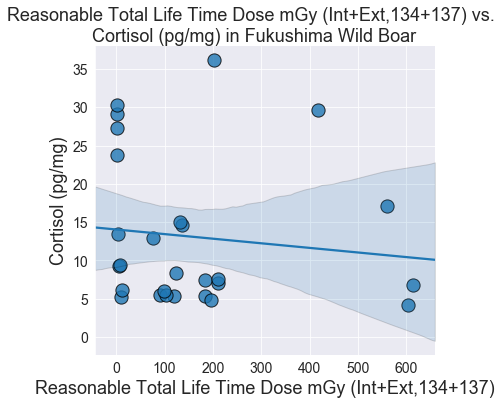

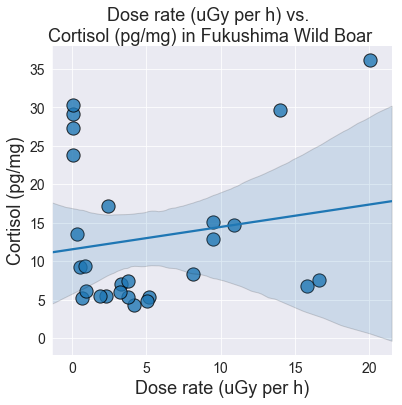

In [4]:
x = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
y = 'Cortisol (pg/mg)'

for col in x:
    f_tm.linear_regression_graphs_between_variables(x=col, y=y, data=total_dose_cortisol)

### Statistics

In [5]:
dose_types = ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']
y = 'Cortisol (pg/mg)'

for dose_type in dose_types:
    f_tm.score_linear_regressions(x=[dose_type], y=y, data=total_dose_cortisol)

Linear regression for ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Cortisol (pg/mg):
Overall R2 is 0.0130

Linear regression for ['Dose rate (uGy per h)'] vs. Cortisol (pg/mg):
Overall R2 is 0.0302



### Commentary - Linear Regression

You may recall that when we analyzed cortisol vs. dose using the prior dose estimates & fewer boar samples, we observed a binary response of cortisol to dose, which we speculated was due to a low number of samples (~15). With an increased number of boar samples (new dose estimates on Aryn's boar + Kelly's) we see that cortisol does not have a binary response to dose. Much like the other markers of stress, we do not see a strong relationship between cortisol and dose (R2 = 0.013) and dose rate (R=0.03). 

### Linear GAMs

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 Reasonable Total Life Time Dose mGy (Int+Ext,134+137) vs. Cortisol (pg/mg)


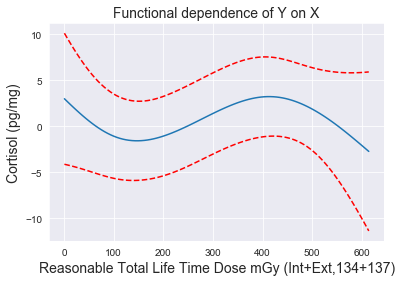

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 Dose rate (uGy per h) vs. Cortisol (pg/mg)


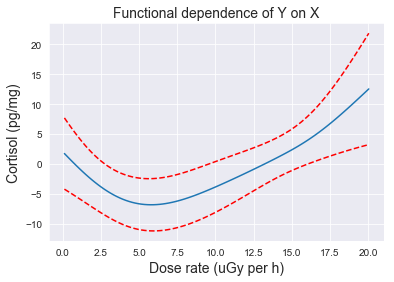

In [6]:
for x in ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Dose rate (uGy per h)']:
    target = 'Cortisol (pg/mg)'
    print(f'PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: \n {x} vs. {target}')
    f_tm.fit_gam_plot_dependencies(df=total_dose_cortisol, features=[x], target=target,
                              basis_1=s, summary=False)

### Commentary - Linear GAMS

In the partial dependency plots we do not observe clear trends between increasing dose or dose rate on the average number of dicentrics. While we see peaks at 500 mGy and ~13uGy/h, the peaks are driven by 1-2 datapoints rather than an actual trend.

In [19]:
# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Snake: dose rate vs. telomere length (qPCR)

Here we'll relate dose rate to mean telomere length (qPCR) in snakes. We do not have age estimates for this species. As was done with all boar data, we visualize linear regressions and quantify R2 scores, then fit linear GAMs to the data and visualize partial dependency plots.

### Visualization

In [20]:
# loading snake telomere (qPCR) & dose data
aryn_snake_df = pd.read_csv('../excel data/cleaned/aryn_snake_df.csv')

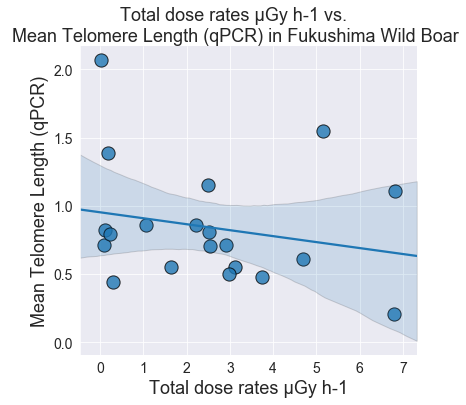

In [21]:
x = 'Total dose rates μGy h-1'
y = 'Mean Telomere Length (qPCR)'

f_tm.linear_regression_graphs_between_variables(x=x, y=y, data=aryn_snake_df)

### Statistics 

In [22]:
dose_type = ['Total dose rates μGy h-1']
y = 'Mean Telomere Length (qPCR)'

f_tm.score_linear_regressions(x=dose_type, y=y, data=aryn_snake_df)

Linear regression for ['Total dose rates μGy h-1'] vs. Mean Telomere Length (qPCR):
Overall R2 is 0.0469



### Commentary - Linear Regressions

We see a very weak relationship between dose rate and mean telomere length (qPCR) in snakes, where dose rate accounts for 4% of the variation (R2 = 0.047) in telomere length. Very similar to boar.

### Linear GAMs

PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: 
 ['Total dose rates μGy h-1'] vs. Mean Telomere Length (qPCR)


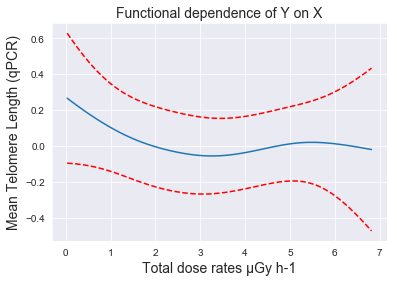

In [23]:
features = ['Total dose rates μGy h-1']
target = 'Mean Telomere Length (qPCR)'
print(f'PARTIAL DEPENDENCY PLOTS FOR LINEAR GAM MODELING: \n {features} vs. {target}')
f_tm.fit_gam_plot_dependencies(df=aryn_snake_df, features=features, target=target,
                          basis_1=s, summary=False)

### Commentary - Linear GAMS

We do not observe a clear trend in this partial dependency plot of mean telomere length (qPCR) and dose rate in snakes.

## Discussion, Conclusions: radiation dose/dose rate and biomarkers in wildlife
---

The purpose of this study is to ascertain whether the health of wildlife in regions contaminated by the Fukushima Daiichi Nuclear Disaster is discernably impacted by chronic, low-dose exposure to ionizing radiation. If wildlife were being impacted health-wise by these exposures, we hypothesized that a dose response would be evident when comparing a number of health-relevant biomarkers to dose in wild animals. When examining the relationships in wild boar between total dose or dose rate to telomere length, dicentrics, and cortisol, in all cases we observed extremely weak associations. The same was true for dose rate and telomere length in snakes. Overall, the 'strongest' relationship observed was between total dose and telomere length (qPCR), while controlling for age, with an R2 value of 0.0579. 

We did not observe significant impacts from dose or dose rate on our biomarkers in question, and thus conclude that the given range of dose and dose rates in the contaminated regions from which we obtained wildlife samples is not sufficient to impact these biomarkers. Considering the lack of significant impacts, we propose that boar and snake in the contaminated regions do not have significant impacts on health from the chronic low-dose exposure to ionizing radiation. This conclusion may extend to other mammalian and reptilian species. Our data may serve as a useful model for establishing how these environments could impact future humans inhabiting the area.

(misc. notes)    
Recall that we're measuring telomeres in T-cells, cells with exquisite sensitivty to radiation, and that telomeres are an integrated biomarker for health, where longer telomeres and shorter telomeres in general represent better and worse health respectively. Dicentric chromosomes are chromosome fusions which suggest (or could initiate) genomic instability, and cortisol is a generalized, well-accepted marker for stress.